In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from IPython.display import Image

# Student Performance Dataset 

![](https://images.pexels.com/photos/261909/pexels-photo-261909.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)

In [4]:
df = pd.read_csv('student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# **Proven hypothesis**
## *The academic performance of a student depends not only on their academic capabilities but also their socio-economic status.*



## **Imagine this...**

## *You are a headmaster/headmistress, managing a school of thousands of students. How do you create the ideal environment for students to academically excel in their education?*

![alt text here](https://images.pexels.com/photos/5212700/pexels-photo-5212700.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)


# **ET VOILA!**

# **The Student Forecaster Model**: 
# https://student-forecaster.streamlit.app/

# *Step 1:* Exploratory analysis 
- Distribution and spread of the data 
- Dropping columns which at first look are not relevant


In [86]:
df_dropped = df[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet', 'G3']]
df_dropped['G3_binary'] = pd.cut(x = df_dropped['G3'], bins=[df_dropped['G3'].min()-1, df_dropped['G3'].mean(), df_dropped['G3'].max()+1], labels=['fail', 'pass'])

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_67475/626108447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['G3_binary'] = pd.cut(x = df_dropped['G3'], bins=[df_dropped['G3'].min()-1, df_dropped['G3'].mean(), df_dropped['G3'].max()+1], labels=['fail', 'pass'])


In [164]:
d1 = [
    ['home address', 'not relevant to data'],
      ['parents jobs', 'over 50percent of data classified as other'],
      ['attended nursery', 'studies show attendance no longer relevant'],
      ['1st and 2nd term grades', 'G3, the final grade is the only target variable']
]
d1_dropped = pd.DataFrame(data = d1, columns=['Columns grouping of data', 'Reason'])

In [73]:
#First glance dropped columns
d1_dropped

,Columns grouping of data,Reason
0,home address,not relevant to data
1,parents jobs,over 50percent of data classified as other
2,attended nursery,studies show attendance no longer relevant
3,First and second term grades,"Final grade, G3 only important target variable"


# *Step 2:* Creating subgroups of data
- To map out relationships between columns of data

In [97]:
d3 = [
    ['age, Dalc,Walc, health', 'alcohol intake during weekday and weekend'], 
    ['famsize, Pstatus, guardian, famrel', 'quality of family relationships'],
    ['studytime,activities, freetime, goout, absences, romantic', 'time related to studying'],
    ['schoolsup, famsup, paid,higher,failures', 'extra educational support'],
    ['school, age, Medu,reason, traveltime, failures,internet', 'Impact of reason to pick school'],
    ['Medu, Fedu', 'parents level of education']

    ]

df3 = pd.DataFrame(data = d3, columns=['original columns', 'Sub-group'])

In [165]:
#Subgrouping of data columns
df3

,original columns,Sub-group
0,"age, Dalc,Walc, health",alcohol intake during weekday and weekend
1,"famsize, Pstatus, guardian, famrel",quality of family relationships
2,"studytime,activities, freetime, goout, absence...",time related to studying
3,"schoolsup, famsup, paid,higher,failures",extra educational support
4,"school, age, Medu,reason, traveltime, failures...",Impact of reason to pick school
5,"Medu, Fedu",parents level of education


# *Step 3:* Analysis within sub-groups 
- To decide the dominating variables most explaining the target variable

In [184]:
d2 = [
    ['alcohol intake during weekday and weekend', 'heatmap correlation, count by grouping', 'column removed'], 
    ['quality of family relationships', 'heatmap correlation, value counts', 'droped all columns as no evident relation to grade'],
    ['time related to studying', 'heatmap correlation', 'dropped all columns except the study time and freetime which impacted G3'],
    ['extra educational support', 'heatmap correlation and value counts', 'if a student has failed then they likely have additional support'],
    ['Impact of reason to pick school', 'percentage value counts and heatmap correlation', 'choice of school has an impact on grades'],
    ['parents level of education', 'value counts by each combination of parents education', 'only keep mother education']

    ]

d4 = [
    ['alcohol intake during weekday and weekend', 'column dropped'], 
    ['quality of family relationships', 'columns dropped'],
    ['time related to studying', 'dropped all columns except the study time and freetime'],
    ['extra educational support', 'all columns dropped except failure'],
    ['Impact of reason to pick school', 'all columns kept'],
    ['parents level of education', 'fathers education dropped']
    ]

df_analysis2 = pd.DataFrame(data = d4, columns=['Sub-group', 'Action']
                           )

## **Summary of analytical methods used:**
- Heatmap correlation
- Value counts
- Grouping by bins 
- Histograms
- Boxplot

In [103]:
df_family = df[['famsize', 'Pstatus', 'guardian', 'famrel', 'G3']]
df['famsize2'] = df['famsize'].replace({'GT3': 1, 'LE3': 0})
df['Pstatus2'] = df['Pstatus'].replace({'T': 1, 'A': 0})
df['guardian2'] = df['guardian'].replace({'mother': 1, 'father': 0, 'other': 3})
df_family2 = df[['famsize2', 'Pstatus2', 'guardian2','famrel', 'G3']]


## Correlation Heatmap

<Axes: >

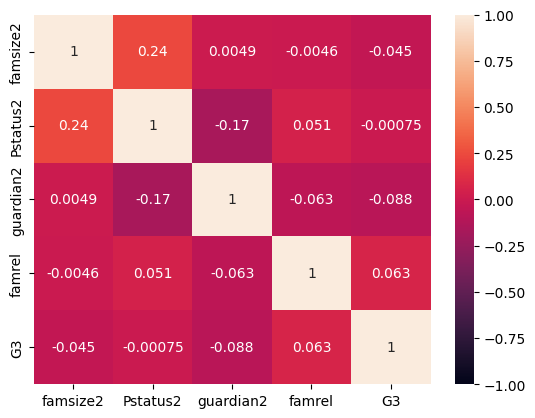

In [185]:
#Heatmap of correlation of the subgroup of family relationships with 
#final grade G3
sns.heatmap(df_family2.corr(), vmin=-1, vmax=1, annot=True)

## Creating bins and summarising data 

In [107]:
df_alcohol = df[['age', 'Dalc','Walc', 'health']]
df_alcohol_counted = df_alcohol[['Dalc', 'Walc', 'age']].value_counts().reset_index().sort_values('Dalc')
df_alcohol_counted['bins'] = pd.cut(df_alcohol_counted['age'], bins=[14, 17, 22])
#df_alcohol_counted = df_alcohol_counted.drop(columns='age')


,Dalc,Walc,age,count,bins
0,1,1,16,68,"(14, 17]"
8,1,2,15,16,"(14, 17]"
48,1,1,20,2,"(17, 22]"
9,1,3,16,16,"(14, 17]"
7,1,3,17,21,"(14, 17]"
...,...,...,...,...,...
62,5,1,18,1,"(17, 22]"
61,5,2,21,1,"(17, 22]"
38,5,5,16,3,"(14, 17]"
32,5,5,18,4,"(17, 22]"


In [186]:
# Value counts of grouping of students by age and level of drinking 
# during the weekday and weekend 
df_alcohol_counted.sort_values(by=['Dalc'])

,Dalc,Walc,age,count,bins
0,1,1,16,68,"(14, 17]"
8,1,2,15,16,"(14, 17]"
48,1,1,20,2,"(17, 22]"
9,1,3,16,16,"(14, 17]"
7,1,3,17,21,"(14, 17]"
...,...,...,...,...,...
62,5,1,18,1,"(17, 22]"
61,5,2,21,1,"(17, 22]"
38,5,5,16,3,"(14, 17]"
32,5,5,18,4,"(17, 22]"


## Sub-group analysis deduction

In [183]:
# Dataframe of subgroup of data, analytical method used and deductions drawn
df_analysis2

,Sub-group,Conclusion
0,alcohol intake during weekday and weekend,column dropped
1,quality of family relationships,columns dropped
2,time related to studying,dropped all columns except the study time and ...
3,extra educational support,all columns dropped except failure
4,Impact of reason to pick school,all columns kept
5,parents level of education,fathers education dropped


## Conclusion from data 

- The biggest impact to G3 is failure
- If a student has failed then they likely have additional support
- Nearly 95% of students want to pursue higher education, so data is heavily skewed
- Over 90% of students do not have paid support but 60% of students have support at home

In [171]:
#Final dataframe of chosen variables for training the model
df_dropped.head()

,sex,age,Medu,reason,traveltime,studytime,freetime,higher,failures,internet,G3,G3_binary,G3_binary_label
0,F,18,4,course,2,2,3,yes,0,no,11,fail,0
1,F,17,1,course,1,2,3,yes,0,yes,11,fail,0
2,F,15,1,other,1,2,3,yes,0,yes,12,pass,1
3,F,15,4,home,1,3,2,yes,0,yes,14,pass,1
4,F,16,3,home,1,2,3,yes,0,no,13,pass,1


# *Machine Learning Part 1:* 
## Label encoding the target variable G3

In [120]:
#Label encoding the target variable

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_dropped['G3_binary_label'] = label_encoder.fit_transform(df_dropped['G3_binary'])

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_67475/3581341554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['G3_binary_label'] = label_encoder.fit_transform(df_dropped['G3_binary'])


In [172]:
#Label encoding the target variable
df_dropped[['G3_binary',	'G3_binary_label']].head()

,G3_binary,G3_binary_label
0,fail,0
1,fail,0
2,pass,1
3,pass,1
4,pass,1


# *Machine Learning Part 2:* 
## Splitting the train and test data 

In [181]:
from sklearn.model_selection import train_test_split

#Split the data into train and test
train_data, test_data = train_test_split(df_dropped, test_size=0.1, random_state=42)

#Ready X and Ys
X_train = train_data[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet']]
y_train = train_data['G3_binary_label']

X_test = test_data[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet']]
y_test = test_data['G3_binary_label']

# *Machine Learning Part 3:* 
## The pipeline: preprocessing and model 


In [182]:
#Boosting
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

## **Pre-processing pipeline:**
### to *scale the numerical variables* and *One Hot Encode the categorical variables*

In [188]:
# Scale numerical values: 
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

# Encode categorical values
cat_transformer = OneHotEncoder()

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age','Medu', 'traveltime', 'studytime', 'freetime', 'failures']),
    ('cat_transformer', cat_transformer, ['sex', 'reason', 'higher', 'internet']),
])


# The classification model used

In [189]:

model = GradientBoostingClassifier()

pipeline4 = Pipeline([
    ('preprocessor', preprocessor),
    ('boosting', model),
])


# *Full pipeline*

In [190]:

pipeline4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('boosting', GradientBoostingClassifier())])

# *Machine Learning Part 4:* 
## *Training, fitting and comparing scoring metrics across different models*


In [152]:
d_model = [
    ['Lgistic Regression', '0.75', '0.72 vs 0.72', 'No Overfitting'],
    ['KNN KNeighborsClassifier', '0.76', '0.67 vs 0.83','Overfitting'],
    ['Random Forest Classifier', '0.81', '0.70 vs 0.98', 'Overfitting'],
    ['XGB Classifier','0.82' , '0.68 vs 0.95', 'Overfitting'],
    ['Gradient Boosting Classifier', '0.76', '0.70 vs 0.78', 'Slightly Overfitting']
]
df_model = pd.DataFrame(data = d_model, columns=['model used', 'precision', 'Test vs Train precision CV', 'Over/Underfitting'])

In [151]:
#Comparisons of different models tried and tested
df_model

,model used,precision,Test vs Train precision CV,Over/Underfitting
0,Lgistic Regression,0.75,0.72 vs 0.72,No Overfitting
1,KNN KNeighborsClassifier,0.76,0.67 vs 0.83,Overfitting
2,Random Forest Classifier,0.81,0.70 vs 0.98,Overfitting
3,XGB Classifier,0.82,0.68 vs 0.95,Overfitting
4,Gradient Boosting Classifier,0.76,0.70 vs 0.78,Slightly Overfitting


In [155]:
pipeline4.fit(X_train, y_train)
y_predict4 = pipeline4.predict(X_test)

#precision
from sklearn.metrics import precision_score

precision_score(y_test, y_predict4)

0.7608695652173914

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict4)

# Calculate the precision
precision = precision_score(y_test, y_predict4)

# Calculate the recall
recall = recall_score(y_test, y_predict4)

# Calculate the f1 score
f1 = f1_score(y_test, y_predict4)

# Print the results
print("Accuracy:",round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

# Returns:
# Accuracy: 0.956140350877193
# Precision: 0.9459459459459459
# Recall: 0.9859154929577465
# F1 Score: 0.9655172413793103

Accuracy: 0.77
Precision: 0.76
Recall: 0.9
F1 Score: 0.82


# **Detail on the classification model chosen:** 
## *Gradient Boosting Classifier*

- Good scoring metrics
- Less overfitting on training data 




In [193]:
print("Accuracy:",round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.77
Precision: 0.76
Recall: 0.9
F1 Score: 0.82


# *Thank you for your attention*
![](https://images.pexels.com/photos/5912586/pexels-photo-5912586.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)